# Social network exploration

This notebook starts from the output generated at step 4 (04_trades_featureEng.ipynb), building and exploring the network of buyers and sellers.

In [1]:
import numpy as np
import pandas as pd 
from scripts_network.network_analysis_exp import *
from scripts_network.network_bond_graph import *
from scripts_network.network_modelling import *
from scripts_network.network_visualization import *
from scripts_network.network_visualization import TTQcolor
import networkx as nx
import seaborn as sns

from datetime import timedelta

from bokeh.io import show, output_notebook, output_file, save
from matplotlib import pyplot as plt

output_notebook()

Loading BokehJS ...

## Importing data

In [2]:
datafolder = ".."+"/data/"
filename = "02_instrumentsdf_2.pkl"

df = pd.read_pickle(datafolder+filename)

In [3]:
nodes = create_nodes_df(df)

In [4]:
edges = create_edges_df(df, fields=['is_pastdue90', 'is_pastdue180', 'has_impairment1'])

In [5]:
graph, edges, nodes = create_network(edges, nodes, R=0.65, nperlayer=40, nodescircles=0.045)

In [6]:
nodes[nodes.Type_2=='seller and buyer']

,Company_Name,ID,Type,Type_2,centrality,size,coords
3334,Cooperative Inventors Corporation,'2004022',seller,seller and buyer,0.036440,9.20,"[0.22951570293352608, -0.01491784525088845]"
3335,Remington Muskegon Corporation,'che2004009',seller,seller and buyer,0.001792,6.13,"[0.7517085842968866, -0.7614684525929948]"
3336,McKesson Gumptia Inc.,'2004020',seller,seller and buyer,0.031661,8.78,"[0.08177451937631196, -0.2149719237034763]"
3337,Telex Inc.,'2004029',seller,seller and buyer,0.001792,6.13,"[-1.0687004927402282, 0.052718657198314145]"
3338,Johansen Wilhelmina Sarl,'2004033',seller,seller and buyer,0.003883,6.32,"[0.1873538316356163, 0.7674624041420226]"
3339,Alva Apprentices and Pigeonberries SA,'2004032',seller,seller and buyer,0.002688,6.21,"[-0.6026755165980907, -0.5107663082988388]"
3340,Universal Societies Ltd,'2004041',seller,seller and buyer,0.002091,6.16,"[0.6751570351053903, 0.4101987054437142]"
3341,DARPA Elijah Co.,'2004046',seller,seller and buyer,0.002987,6.24,"[0.18148715406873178, -0.7688708688122035]"
3342,Katharine Corporation,'2004063',seller,seller and buyer,0.000597,6.03,"[1.063947907852751, -0.11364351884623185]"
3343,Tananarive Flintlocks Inc.,'2004055',seller,seller and buyer,0.007766,6.66,"[-0.5047898195816675, 0.07271339661099338]"


In [7]:
g_viz = visualize_graph(graph, edges, nodes, plot_h=1200, plot_w=1200, #to_highlight='is_pastdue90',
                       circularLayout=False, nx_k=0.025, nx_iterations=30,
                       nodes_colors = [TTQcolor['sky'], TTQcolor['richBrown'], TTQcolor['marketplaceOrange']])

#output_file('../data/viz_data/graph_spring.html')
#save(g_viz)

show(g_viz)

In [8]:
edge_attr = ['currency', 'invoice_date', 'invoice_amount',
        'is_due', 'due_date',
        'value_date', 'has_purchase', 'has_impairment1', 'is_pastdue90',
            'is_pastdue180']

In [9]:
g = nx.from_pandas_edgelist(df,
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)

In [10]:
g_flat = nx.from_pandas_edgelist(df,
                                 source='debtor_name_1',
                                 target='customer_name_1',
                                 create_using=nx.DiGraph)

In [11]:
sorted_components = sorted([(len(component),component) for component in nx.connected_components(g_flat.to_undirected())], key=lambda x: x[0], reverse=True)

In [55]:
sorted_components[4]

(45,
 {'Addressograph Derek SA',
  'Alden Parsi SA',
  'Amherst Nyquist Inc.',
  'Arabic Westfield Corporation',
  'Arrhenius Ferrer GmbH',
  'Athens Audubon United Corporation',
  'Authentic Famines S.p.a.',
  'Bakersfield Rents GmbH',
  'Bentley Candies and Deceases Corporation',
  'Bonn Comethes Limited',
  'Britten Sadie Supply GmbH',
  'Bucharest Co.',
  'Budweiser Alexei LLC',
  'Caesar Apollonian SA',
  'Christianson Peoria Sarl',
  'Diogenes Wyatt International Corporation',
  'Disneyland S.p.a.',
  'Doneck Regulatories and Merries Inc.',
  'Euripides AR & Son GmbH',
  'Flanagan Adenosines and Watchworkses Limited',
  'Frick Falmouth LLC',
  'GAO Burch Limited',
  'Gabriel Scarces and Indies GmbH',
  'Galatia Graphes LLC',
  'Galilee Views S.p.a.',
  'Jacobian Intervenes Sarl',
  'Jo Filials GmbH',
  'Kremlin Liggett LLC',
  'Leon Quantifies S.p.a.',
  'Littleton Opel GmbH',
  'Manama Limited',
  'McGowan Bandstops and Savoies LLC',
  'Mt S.p.a.',
  'Pam Sarl',
  'Penn Borders 

In [12]:
giant_component = g.subgraph(nodes=sorted_components[0][1])

In [13]:
giant_component_flat = g_flat.subgraph(nodes=sorted_components[0][1])

In [14]:
df = df[df.debtor_name_1.isin(list(giant_component.nodes)) | df.customer_name_1.isin(list(giant_component.nodes))]

In [15]:
pastdue_col = 'is_pastdue90'
past_due_nodes = df[df[pastdue_col]==True]['debtor_name_1'].unique()

In [16]:
df.head()

,customer_id,customer_name_1,debtor_id,debtor_name_1,invoice_number,invoice_date,due_date,invoice_amount,purchase_amount,purchase_amount_open,...,total_repayment,total_impairment,is_open,we_payment_share,has_purchase,has_deduction,is_due,has_discharge,cash_check,unexpl
uid,,,,,,,,,,,,,,,,,,,,,
2744:79/231,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2744,2013-07-23,2013-08-02,913.70,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,913.70,True
2861:79/232,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2861,2013-07-30,2013-08-09,2233.45,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,2233.45,True
2932:79/233,2004008,Castillo GmbH,79,Sana Hyannis Sarl,2932,2013-08-06,2013-08-16,1370.50,0.0,0.0,...,1370.50,0.00,False,1.0,False,False,True,False,0.00,False
1472:489/688,2004009,Orpheus Wyandotte Supply LLC,489,Isfahan SA,1472,2013-08-13,2013-08-23,9195.10,0.0,0.0,...,0.00,0.00,False,NaN,False,False,True,True,9195.10,True
2042:512/645,2004009,Orpheus Wyandotte Supply LLC,512,Aldrich Chloe GmbH,2042,2013-08-13,2013-08-23,4594.60,0.0,0.0,...,164.35,164.35,False,1.0,False,False,True,True,4265.90,True


In [17]:
 first_invoice_date = df['invoice_date'].min()
last_invoice_date = df['invoice_date'].max()
print('{0} - {1}'.format(first_invoice_date,last_invoice_date))

2013-07-23 00:00:00 - 2018-12-18 00:00:00


In [18]:
 num_days = (last_invoice_date-first_invoice_date).days

In [19]:
days_linspace = reversed(np.linspace(start=num_days, stop=0,num=100,endpoint=False, dtype=int))

In [20]:
dates_linspace = [first_invoice_date + timedelta(days=int(x)) for x in days_linspace]

In [21]:
def get_time_window(row):
    return dates_linspace[np.argmax([row['invoice_date'] <= date for date in dates_linspace])]

In [22]:
df['invoice_date_window'] = df.apply(get_time_window,axis=1)

In [23]:
 debtors = df['debtor_name_1'].unique()

## Network evolution

In [29]:
 num_nodes_window = [nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [31]:
num_debtor_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [33]:
num_customer_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [34]:
cum_num_nodes_window = [nx.from_pandas_edgelist(df[(df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [35]:
cum_num_debtor_window = [len(df[(df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [36]:
cum_num_customer_window = [len(df[(df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [37]:
num_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [38]:
num_pastdue90_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df[pastdue_col]==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [39]:
num_pastdue180_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['is_pastdue180']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [40]:
num_impairment_transations_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['has_impairment1']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

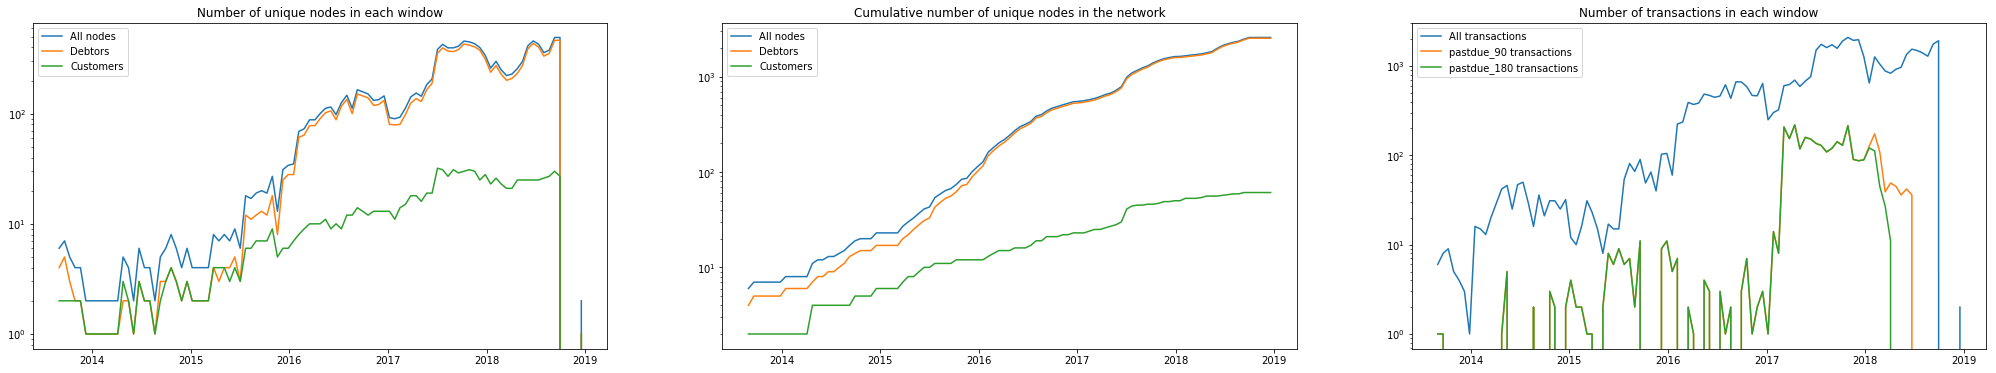

In [48]:
fig,axes = plt.subplots(1, 3, figsize=(35,6))
axes[0].plot(dates_linspace[1:], num_nodes_window, label='All nodes')
axes[0].plot(dates_linspace[1:], num_debtor_window, label='Debtors')
axes[0].plot(dates_linspace[1:], num_customer_window, label='Customers')
axes[0].legend()
axes[0].set_yscale("log", nonposy='clip')
axes[0].set_title('Number of unique nodes in each window')
axes[1].plot(dates_linspace[1:], cum_num_nodes_window, label='All nodes')
axes[1].plot(dates_linspace[1:], cum_num_debtor_window, label='Debtors')
axes[1].plot(dates_linspace[1:], cum_num_customer_window, label='Customers')
axes[1].set_yscale("log", nonposy='clip')
axes[1].legend()
axes[1].set_title('Cumulative number of unique nodes in the network')
axes[2].plot(dates_linspace[1:], num_transations_window, label='All transactions')
axes[2].plot(dates_linspace[1:], num_pastdue90_transations_window, label='pastdue_90 transactions')
axes[2].plot(dates_linspace[1:], num_pastdue180_transations_window, label='pastdue_180 transactions')
axes[2].legend()
axes[2].set_yscale("log", nonposy='clip')
axes[2].set_title('Number of transactions in each window')
plt.show()

C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


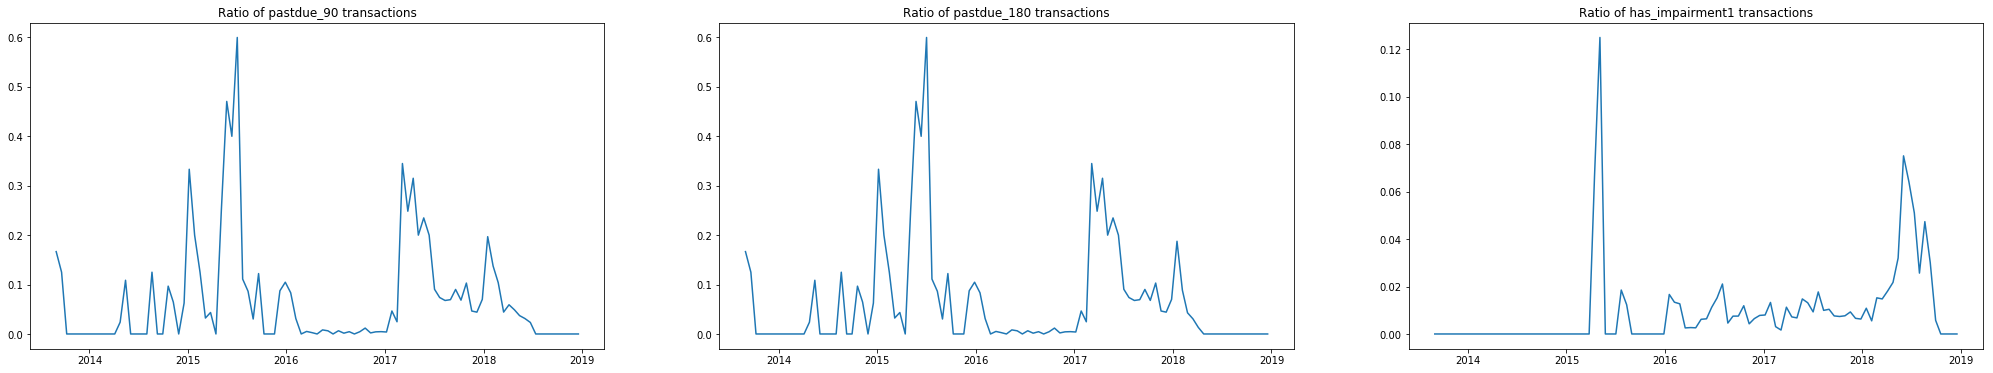

In [45]:
fig,axes = plt.subplots(1, 3, figsize=(35,6))
axes[0].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue90_transations_window,num_transations_window)))
axes[0].set_title('Ratio of pastdue_90 transactions')
axes[1].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue180_transations_window,num_transations_window)))
axes[1].set_title('Ratio of pastdue_180 transactions')
axes[2].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_impairment_transations_window,num_transations_window)))
axes[2].set_title('Ratio of has_impairment1 transactions')
plt.show()

In [35]:
print('Number of nodes beeing debtor and customer simultanously -',len(np.intersect1d(df.debtor_name_1.unique(),df.customer_name_1.unique())))

Number of nodes beeing debtor and customer simultanously - 14


## Transaction amounts in time

In [36]:
group_invoice_date_window = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount']

In [37]:
 flow_array = np.empty([len(debtors),len(dates_linspace)])
for debtor_key, debtor in enumerate(debtors):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array[debtor_key, time_window_key] = group_invoice_date_window.loc[debtor].loc[time_window]
        except:
            flow_array[debtor_key, time_window_key] = 0

In [38]:
 row_max = flow_array.max(axis=1)
flow_array = flow_array / row_max[:, np.newaxis]

Text(0.5,1,'All debtors')

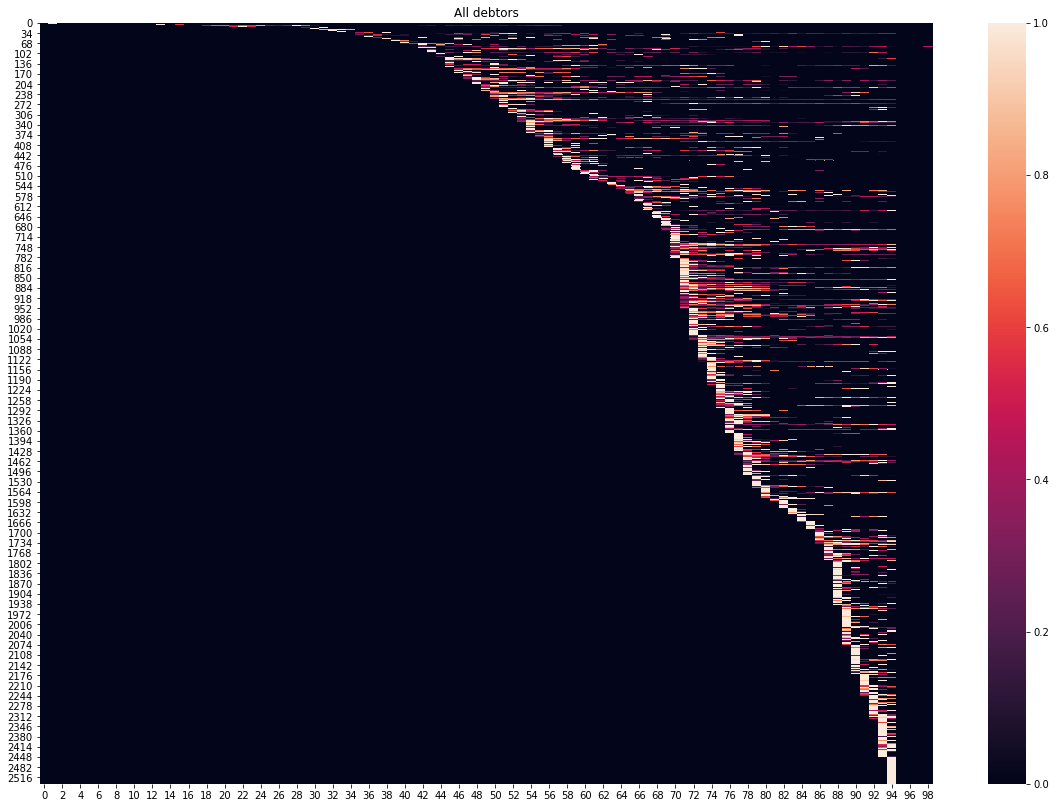

In [39]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array)
plt.title('All debtors')

In [40]:
print("Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor")

Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor


In [41]:
 y = np.bincount(np.where(flow_array!=0)[0])

In [42]:
 y = y-1

In [43]:
 ii = np.nonzero(y)[0]

Text(0.5,1,'Debotrs with more than 1 time-window with transactions')

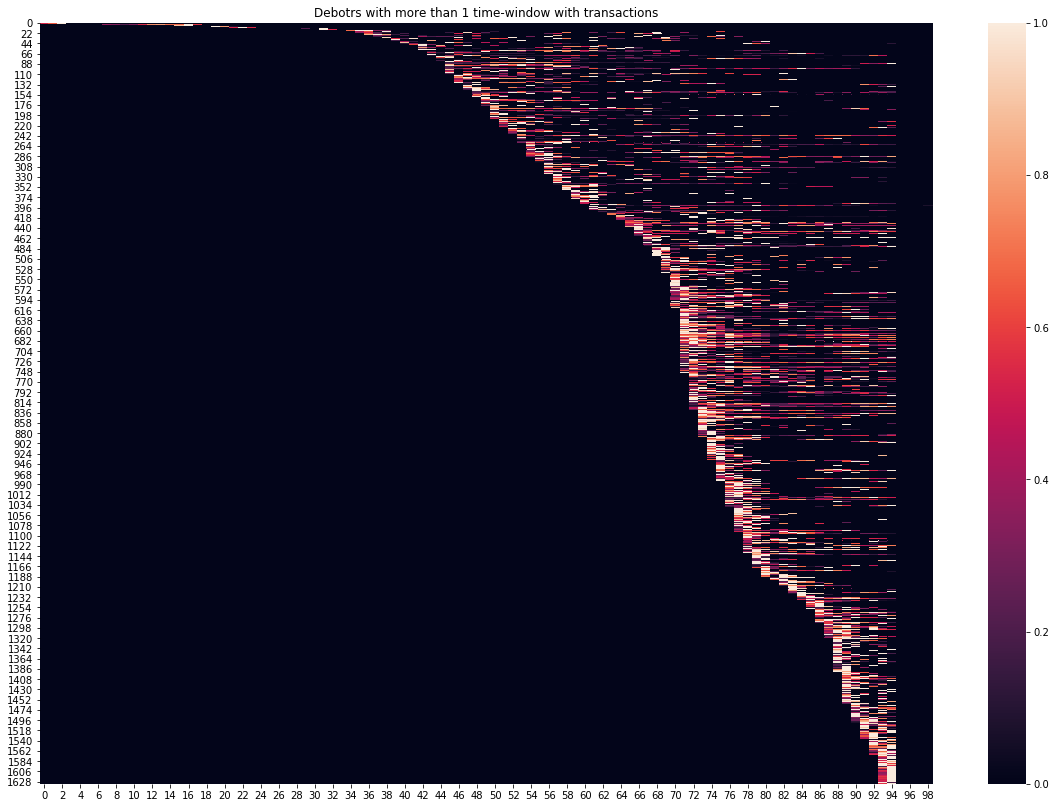

In [44]:
 plt.figure(figsize=(20,14))
sns.heatmap(flow_array[ii,:])
plt.title('Debotrs with more than 1 time-window with transactions')

## Pastdue90 transactions over time

In [46]:
df['invoice_amount_pastdue90'] = df.apply(lambda row: row['invoice_amount'] if row[pastdue_col] else 0, axis=1)

In [47]:
group_invoice_date_window_pastdue_90 = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount_pastdue90']

In [48]:
flow_array_pastdue_90 = np.empty([len(np.intersect1d(debtors,past_due_nodes)),len(dates_linspace)])
for debtor_key, debtor in enumerate(np.intersect1d(debtors,past_due_nodes)):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array_pastdue_90[debtor_key, time_window_key] = group_invoice_date_window_pastdue_90.loc[debtor].loc[time_window]
        except:
            flow_array_pastdue_90[debtor_key, time_window_key] = 0

In [49]:
row_max = flow_array_pastdue_90.max(axis=1)
row_max[row_max==0]=1
flow_array_pastdue_90 = flow_array_pastdue_90 / row_max[:, np.newaxis]

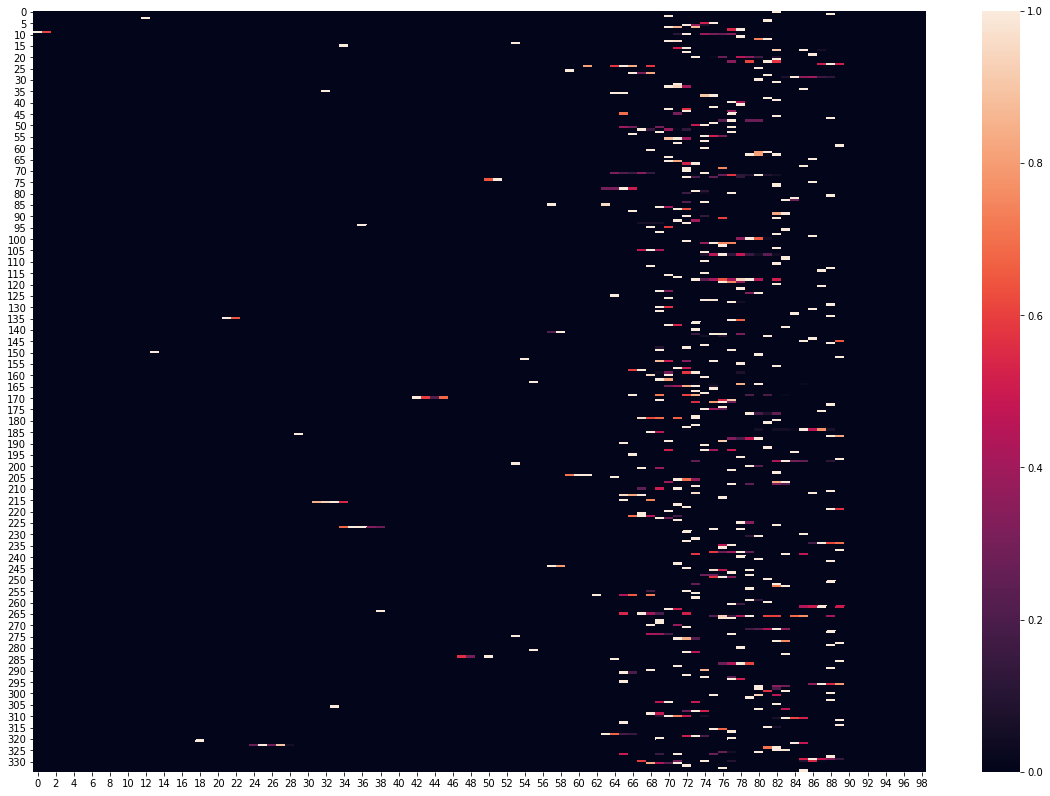

In [50]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array_pastdue_90)

## Degree in time

In [51]:
 list_degree = []

In [52]:
 for date_index, date in enumerate(dates_linspace[1:]):
    network = nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)
    for node in giant_component.nodes:
        list_degree.append({'degree':network.out_degree(node) if network.has_node(node) else 0,
                           'date':date})

In [53]:
df_degree = pd.DataFrame.from_records(list_degree)

In [54]:
 df_degree_clean = df_degree[df_degree.date.isin(df.invoice_date_window)]

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


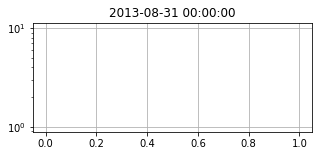

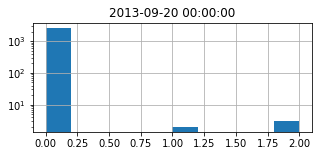

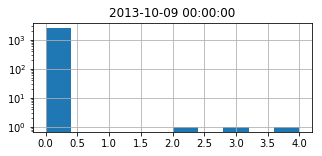

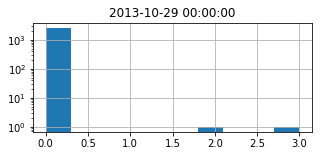

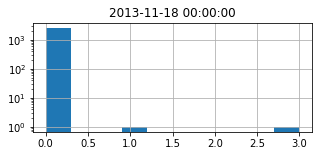

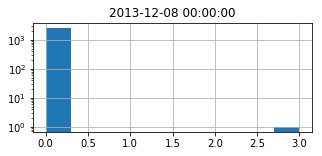

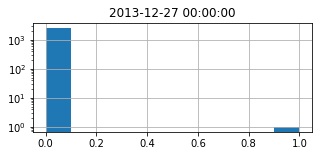

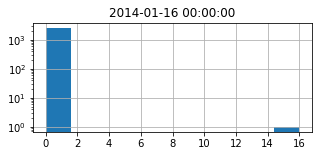

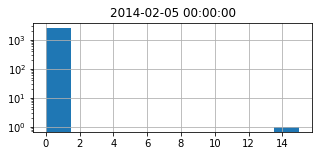

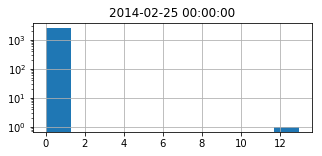

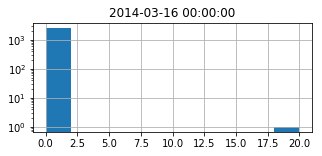

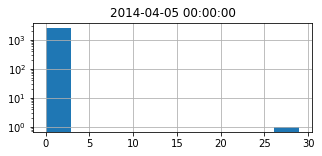

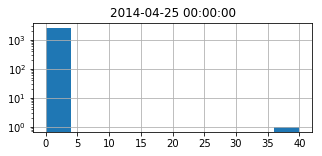

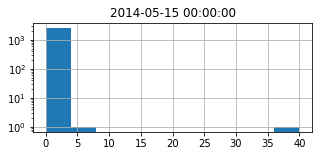

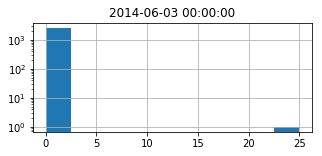

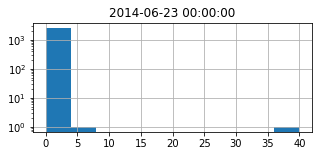

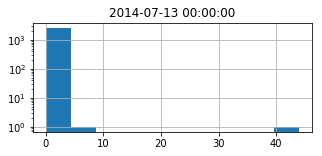

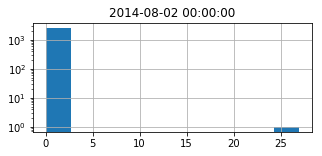

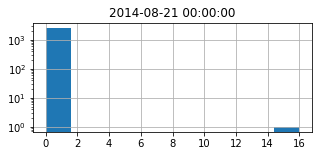

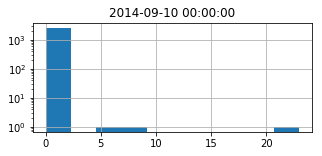

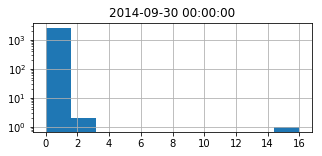

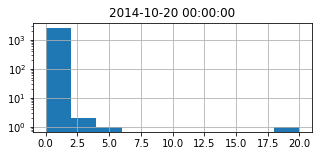

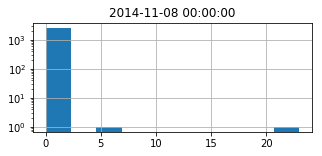

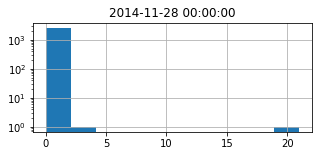

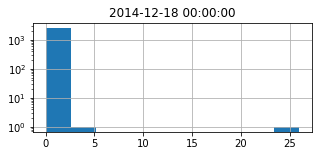

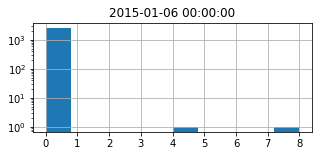

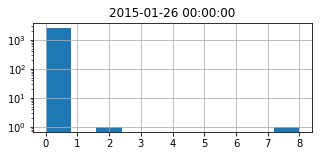

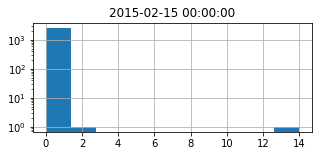

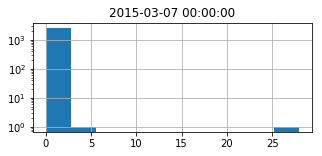

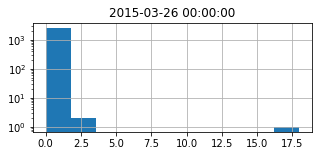

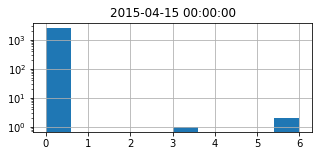

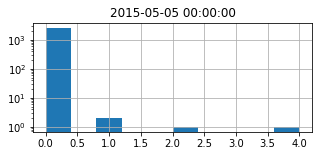

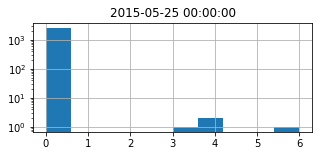

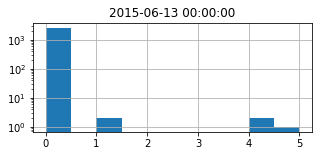

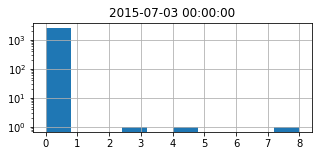

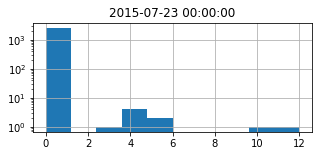

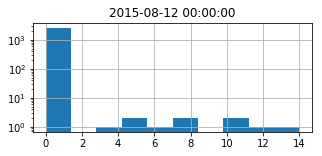

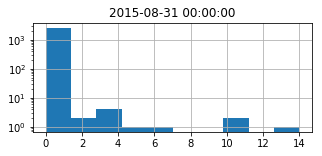

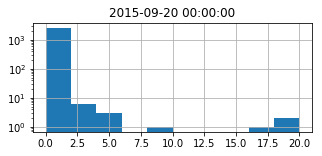

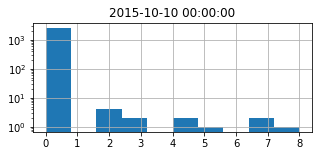

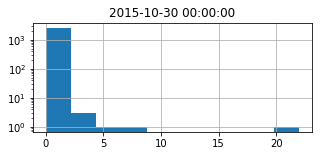

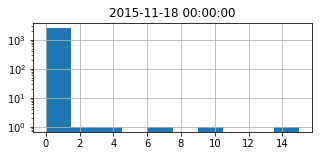

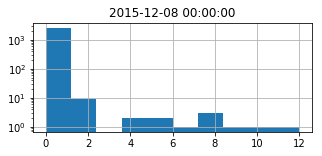

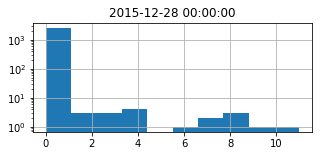

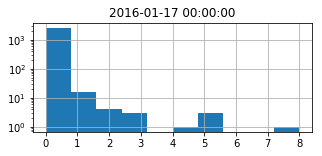

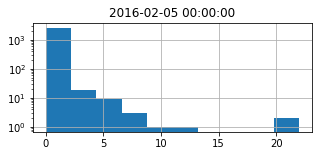

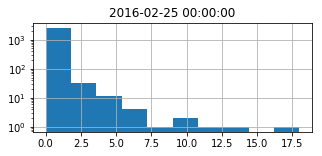

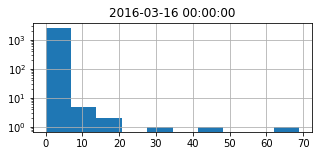

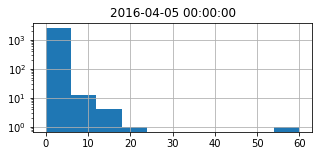

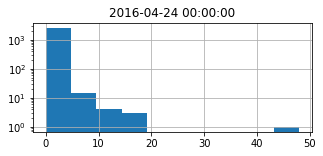

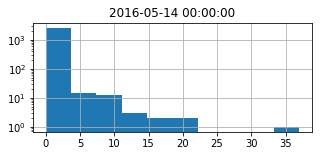

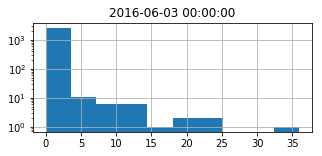

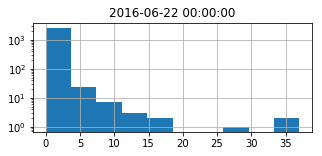

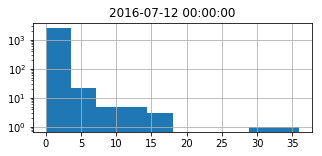

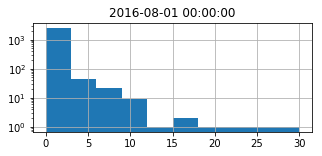

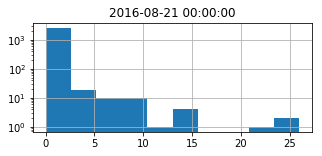

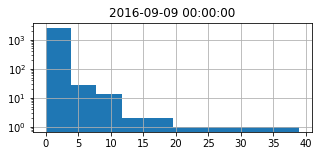

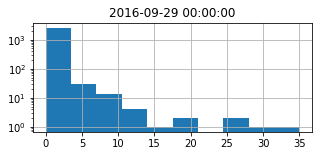

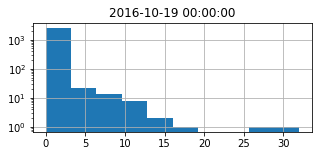

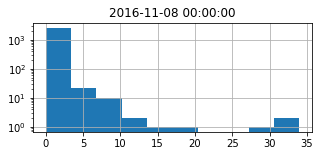

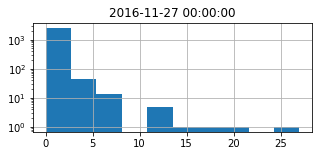

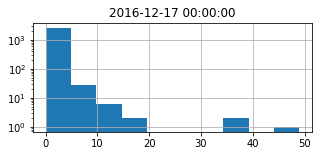

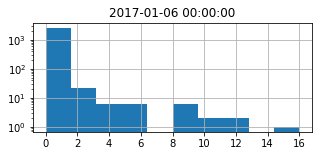

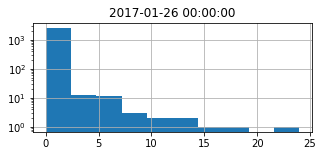

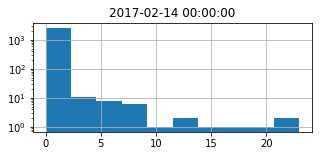

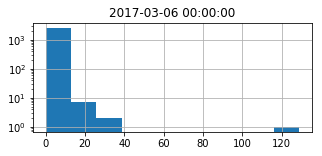

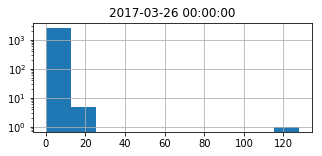

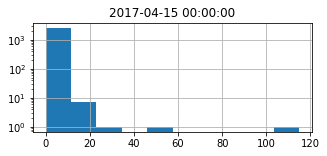

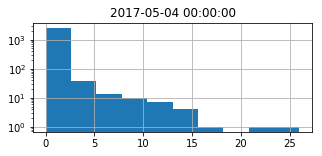

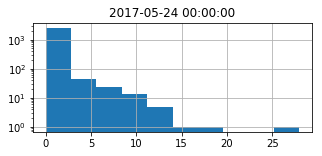

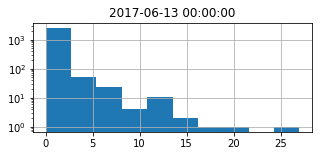

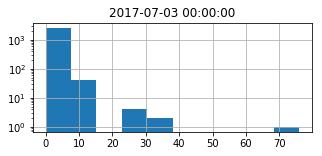

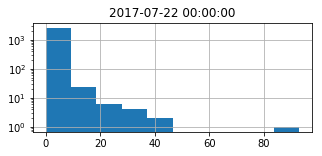

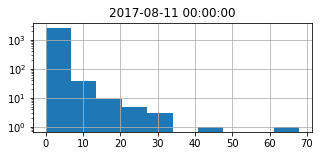

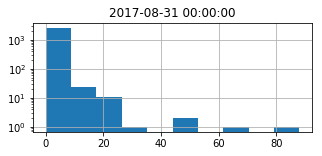

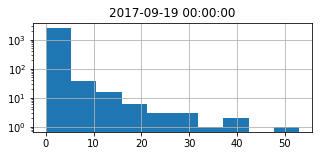

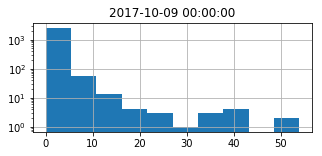

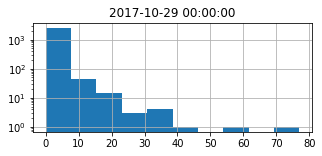

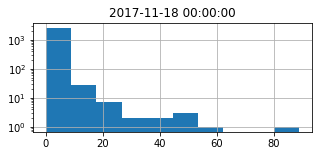

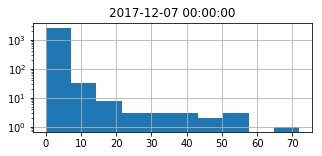

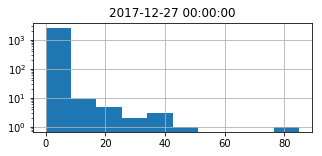

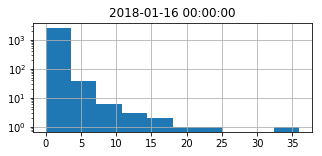

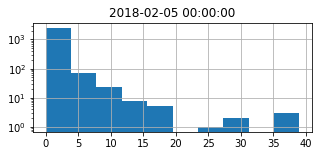

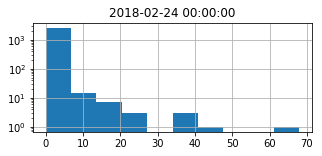

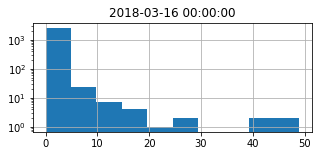

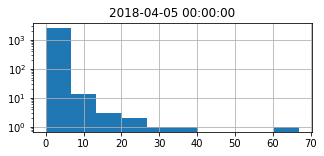

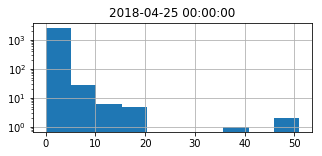

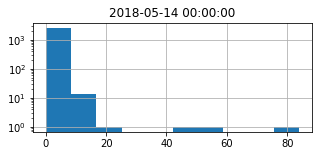

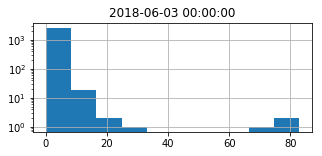

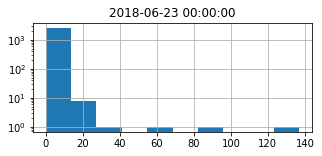

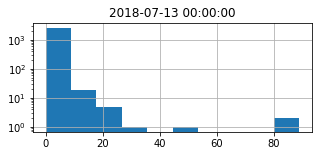

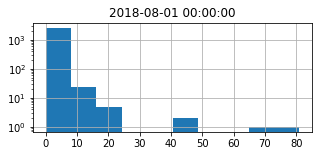

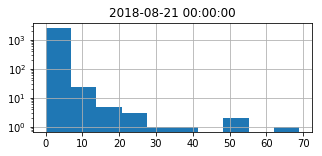

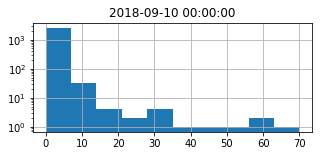

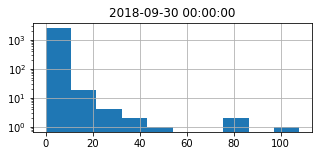

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


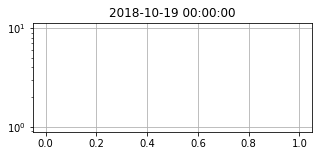

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


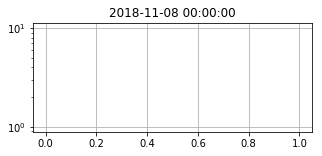

C:\Users\DavideMariani\Anaconda3\envs\mlflow\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


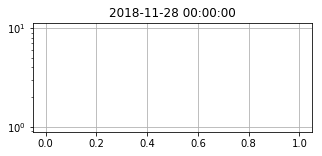

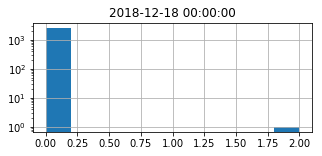

In [55]:
for date in dates_linspace:
    plt.figure(figsize=(5,2))
    df_degree_clean[df_degree_clean.date==date]['degree'].hist(bins=10, log=True)
    plt.title(date)
    plt.show()

In [56]:
print("Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution")

Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution


In [57]:
 df_degree_gr = df_degree.groupby('date').agg([('max',max),
                              ('average',np.mean),
                              ('std',np.std),
                              ('count',lambda value: sum(value>0))])

In [58]:
df_degree_gr = df_degree_gr.reset_index()

In [59]:
list_degree_gr = []
for row in df_degree_gr.itertuples():
    list_degree_gr.append({'date':row[1],
                          'max':row[2],
                          'average':row[3],
                          'std':row[4],
                          'count':row[5]})
df_degree_gr_new = pd.DataFrame.from_records(list_degree_gr)
df_degree_gr_new = df_degree_gr_new[['date','max','average','std','count']]

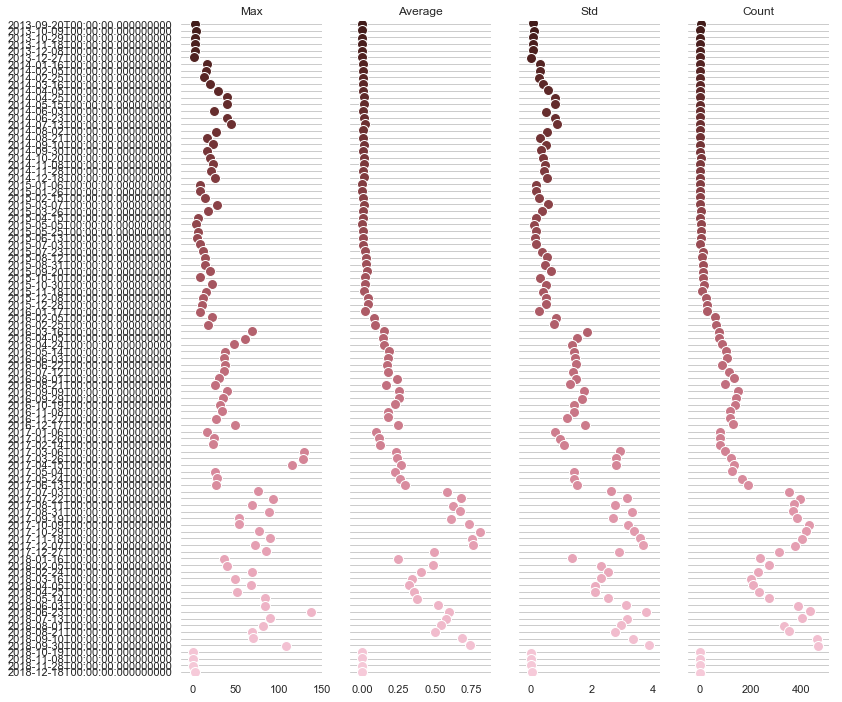

In [60]:
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(df_degree_gr_new,
                 x_vars=df_degree_gr_new.columns[1:], y_vars=["date"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Max",
         "Average",
         "Std",
         'Count']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)